# Importing required Python libraries 

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

# Task 1: Data Preparation
### a) GP student data extraction


In [2]:
# Reading data from excel file
gp_marks = pd.read_excel('GP_marks.xlsx')
gp_marks

,studentID,G1,G2,G3
0,GP1,5,6,6
1,GP2,5,5,6
2,GP3,7,8,10
3,GP4,15,14,15
4,GP5,6,10,10
...,...,...,...,...
344,GP345,11,10,10
345,GP346,13,13,14
346,GP347,16,15,16
347,GP348,10,10,9


In [3]:
# Reading data from csv file
gp_student_info = pd.read_csv('GP_student_info.csv')
print("Rows:",len(gp_student_info.axes[0]), 
      "| Column:",len(gp_student_info.axes[1]))

Rows: 349 | Column: 30


### b) MS school data extraction

In [4]:
# Reading from a json file
ms_marks = pd.read_json('MS_marks.json')
print("Rows:",len(ms_marks.axes[0]), 
      "| Column:",len(ms_marks.axes[1]))

Rows: 46 | Column: 4


In [5]:
#Reading data from sql file
engine = create_engine('mysql+pymysql://root:@localhost:3306/school')
ms_student_info = pd.read_sql('select * from student_details', engine)
print("Rows:",len(ms_student_info.axes[0]), 
      "| Column:",len(ms_student_info.axes[1]))

Rows: 46 | Column: 30


### c) Combining each school data according to studentID  

In [6]:
#combined data of gp school
gp_student_marks_info = pd.merge(gp_student_info, gp_marks, on="studentID")
gp_student_marks_info.head(2)

,studentID,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP1,F,18,U,GT3,A,higher education,higher education,at_home,teacher,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP2,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,excellent,medium,medium,very low,very low,good,4,5,5,6


In [7]:
#combined data of ms school
ms_student_marks_info = pd.merge(ms_student_info, ms_marks, on="studentID")
ms_student_marks_info.head(2)

,studentID,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS1,M,18,R,GT3,T,secondary education,5th to 9th grade,other,other,...,bad,very high,very high,very high,very high,excellent,10,11,13,13
1,MS2,M,19,R,GT3,T,primary education (4th grade),primary education (4th grade),other,services,...,excellent,high,high,medium,medium,bad,8,8,7,8


### d) Adding new column “school” in both dataset

In [8]:
#Adding a new attribute (column) "school" for Gabriel Pereira data set
gp_student_marks_info.insert(loc=0, column="school", value="GP")
gp_student_marks_info.head()

,school,studentID,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,GP1,F,18,U,GT3,A,higher education,higher education,at_home,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP,GP2,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,...,excellent,medium,medium,very low,very low,good,4,5,5,6
2,GP,GP3,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,...,very good,medium,low,low,medium,good,10,7,8,10
3,GP,GP4,F,15,U,GT3,T,higher education,5th to 9th grade,health,...,good,low,low,very low,very low,excellent,2,15,14,15
4,GP,GP5,F,16,U,GT3,T,secondary education,secondary education,other,...,very good,medium,low,very low,low,excellent,4,6,10,10


In [9]:
#Adding a new attribute (column) "school" for Mousinho da Silveira data set
ms_student_marks_info.insert(loc=0, column="school", value="MS")
ms_student_marks_info.head()

,school,studentID,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS,MS1,M,18,R,GT3,T,secondary education,5th to 9th grade,other,...,bad,very high,very high,very high,very high,excellent,10,11,13,13
1,MS,MS2,M,19,R,GT3,T,primary education (4th grade),primary education (4th grade),other,...,excellent,high,high,medium,medium,bad,8,8,7,8
2,MS,MS3,M,17,U,GT3,T,secondary education,secondary education,health,...,very good,very high,high,low,medium,good,2,13,13,13
3,MS,MS4,M,18,U,LE3,T,primary education (4th grade),secondary education,at_home,...,very good,medium,medium,low,medium,good,7,8,7,8
4,MS,MS5,M,19,R,GT3,T,primary education (4th grade),primary education (4th grade),other,...,very good,high,high,medium,medium,excellent,4,8,8,8


### e) Combining all dataset into a single dataset

In [10]:
#Combining all data sets into one
data = pd.concat([gp_student_marks_info, ms_student_marks_info])
data

,school,studentID,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,GP1,F,18,U,GT3,A,higher education,higher education,at_home,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP,GP2,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,...,excellent,medium,medium,very low,very low,good,4,5,5,6
2,GP,GP3,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,...,very good,medium,low,low,medium,good,10,7,8,10
3,GP,GP4,F,15,U,GT3,T,higher education,5th to 9th grade,health,...,good,low,low,very low,very low,excellent,2,15,14,15
4,GP,GP5,F,16,U,GT3,T,secondary education,secondary education,other,...,very good,medium,low,very low,low,excellent,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,MS,MS42,M,20,U,LE3,A,5th to 9th grade,5th to 9th grade,services,...,excellent,very high,high,high,very high,very good,11,9,9,9
42,MS,MS43,M,17,U,LE3,T,secondary education,primary education (4th grade),services,...,bad,high,very high,medium,high,bad,3,14,16,16
43,MS,MS44,M,21,R,GT3,T,primary education (4th grade),primary education (4th grade),other,...,excellent,very high,medium,medium,medium,good,3,10,8,7
44,MS,MS45,M,18,R,LE3,T,secondary education,5th to 9th grade,services,...,very good,high,very low,medium,high,excellent,0,11,12,10


In [11]:
#Sum of the last column (G3)
data["G3"].sum()

4114

# Task 2: Data Understanding

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 45
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   studentID   395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    object
 8   Fedu        395 non-null    object
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    object
 14  studytime   395 non-null    object
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery    

# Task 3: Data Transformation
### a) school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities,  nursery, higher, internet and romantic into binary; 0 or 1 (create new columns without overwriting the existing ones) (1+1+1+1+1+1+1+1+1+1+1+1+1 = 13 marks)

##### i) converting school variables into 0 or 1 and adding values to the new school_native column.

In [13]:
data_school = data["school"].unique() # sorting out the unique elements of school column
data_school # displaying the unique element of school column

array(['GP', 'MS'], dtype=object)

In [14]:
school_dict = dict(zip(data_school,range(len(data_school)))) # assigning the unique elements with binary values to school elements
school_dict # displaying assigned (0 and 1) binary value output 

{'GP': 0, 'MS': 1}

In [15]:
data["school_native"] = data['school'].apply(lambda x:school_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["school","school_native"]] # output of the school and newly added (school_native) columns 

,school,school_native
0,GP,0
1,GP,0
2,GP,0
3,GP,0
4,GP,0
...,...,...
41,MS,1
42,MS,1
43,MS,1
44,MS,1


##### ii) converting sex variables into 0 or 1 and adding values to the new school_native column.

In [16]:
data_sex = data["sex"].unique() # sorting out the unique elements of sex column
data_sex # displaying the unique element of sex column

array(['F', 'M'], dtype=object)

In [17]:
sex_dict = dict(zip(data_sex,range(len(data_sex))))# assigning the unique elements with binary values to sex elements
sex_dict # displaying assigned (0 and 1) binary value output 

{'F': 0, 'M': 1}

In [18]:
data["sex_native"] = data["sex"].apply(lambda x:sex_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["sex","sex_native"]] # output of the sex and newly added (sex_native) columns 

,sex,sex_native
0,F,0
1,F,0
2,F,0
3,F,0
4,F,0
...,...,...
41,M,1
42,M,1
43,M,1
44,M,1


##### iii) converting address variables into 0 or 1 and adding values to the new school_native column.

In [19]:
data_address = data["address"].unique() # sorting out the unique elements of address column
data_address # displaying the unique element of address column

array(['U', 'R'], dtype=object)

In [20]:
address_dict = dict(zip(data_address,range(len(data_address))))# assigning the unique elements with binary values to address elements
address_dict # displaying assigned (0 and 1) binary value output 

{'U': 0, 'R': 1}

In [21]:
data["address_native"] = data["address"].apply(lambda x: address_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["address","address_native"]] # output of the address and newly added (address_native) columns 

,address,address_native
0,U,0
1,U,0
2,U,0
3,U,0
4,U,0
...,...,...
41,U,0
42,U,0
43,R,1
44,R,1


##### iv) converting famsize variables into 0 or 1 and adding values to the new school_native column.

In [22]:
data_famsize = data["famsize"].unique() # sorting out the unique elements of famsize column
data_famsize # displaying the unique element of famsize column

array(['GT3', 'LE3'], dtype=object)

In [23]:
famsize_dict = dict(zip(data_famsize,range(len(data_famsize)))) # assigning the unique elements with binary values to famsize elements
famsize_dict # displaying assigned (0 and 1) binary value output 

{'GT3': 0, 'LE3': 1}

In [24]:
data["famsize_native"] = data["famsize"].apply(lambda x: famsize_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["famsize","famsize_native"]] # output of the famsize and newly added (famsize_native) columns 

,famsize,famsize_native
0,GT3,0
1,GT3,0
2,LE3,1
3,GT3,0
4,GT3,0
...,...,...
41,LE3,1
42,LE3,1
43,GT3,0
44,LE3,1


##### v) converting Pstatus variables into 0 or 1 and adding values to the new school_native column.

In [25]:
data_Pstatus = data["Pstatus"].unique() # sorting out the unique elements of Pstatus column
data_Pstatus # displaying the unique element of Pstatus column

array(['A', 'T'], dtype=object)

In [26]:
Pstatus_dict = dict(zip(data_Pstatus,range(len(data_Pstatus)))) # assigning the unique elements with binary values to Pstatus elements
Pstatus_dict # displaying assigned (0 and 1) binary value output 

{'A': 0, 'T': 1}

In [27]:
data["Pstatus_native"] = data["Pstatus"].apply(lambda x: Pstatus_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["Pstatus","Pstatus_native"]] # output of the Pstatus and newly added (Pstatus_native) columns 

,Pstatus,Pstatus_native
0,A,0
1,T,1
2,T,1
3,T,1
4,T,1
...,...,...
41,A,0
42,T,1
43,T,1
44,T,1


##### vi) converting schoolsup variables into 0 or 1 and adding values to the new school_native column.

In [28]:
data_schoolsup = data["schoolsup"].unique() # sorting out the unique elements of schoolsup column
data_schoolsup # displaying the unique element of schoolsup column

array(['yes', 'no'], dtype=object)

In [29]:
schoolsup_dict = dict(zip(data_schoolsup,range(len(data_schoolsup)))) # assigning the unique elements with binary values to schoolsup elements
schoolsup_dict # displaying assigned (0 and 1) binary value output 

{'yes': 0, 'no': 1}

In [30]:
data["schoolsup_native"] = data["schoolsup"].apply(lambda x: schoolsup_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["schoolsup","schoolsup_native"]] # output of the schoolsup and newly added (schoolsup_native) columns 

,schoolsup,schoolsup_native
0,yes,0
1,no,1
2,yes,0
3,no,1
4,no,1
...,...,...
41,no,1
42,no,1
43,no,1
44,no,1


##### vii) converting famsup variables into 0 or 1 and adding values to the new school_native column.

In [31]:
data_famsup = data["famsup"].unique() # sorting out the unique elements of famsup column
data_famsup # displaying the unique element of famsup column

array(['no', 'yes'], dtype=object)

In [32]:
famsup_dict = dict(zip(data_famsup,range(len(data_famsup)))) # assigning the unique elements with binary values to famsup elements
famsup_dict # displaying assigned (0 and 1) binary value output 

{'no': 0, 'yes': 1}

In [33]:
data["famsup_native"] = data["famsup"].apply(lambda x: famsup_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["famsup","famsup_native"]] # output of the famsup and newly added (famsup_native) columns 

,famsup,famsup_native
0,no,0
1,yes,1
2,no,0
3,yes,1
4,yes,1
...,...,...
41,yes,1
42,no,0
43,no,0
44,no,0


##### viii) converting paid variables into 0 or 1 and adding values to the new school_native column.

In [34]:
data_paid = data["paid"].unique() # sorting out the unique elements of paid column
data_paid # displaying the unique element of paid column

array(['no', 'yes'], dtype=object)

In [35]:
paid_dict = dict(zip(data_paid,range(len(data_paid)))) # assigning the unique elements with binary values to paid elements
paid_dict # displaying assigned (0 and 1) binary value output 

{'no': 0, 'yes': 1}

In [36]:
data["paid_native"] = data["paid"].apply(lambda x: paid_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["paid","paid_native"]] # output of the paid and newly added (paid_native) columns 

,paid,paid_native
0,no,0
1,no,0
2,yes,1
3,yes,1
4,yes,1
...,...,...
41,yes,1
42,no,0
43,no,0
44,no,0


##### ix) converting activities variables into 0 or 1 and adding values to the new school_native column.

In [37]:
data_activities = data["activities"].unique() # sorting out the unique elements of activities column
data_activities # displaying the unique element of activities column

array(['no', 'yes'], dtype=object)

In [38]:
activities_dict = dict(zip(data_activities,range(len(data_activities)))) # assigning the unique elements with binary values to activities elements
activities_dict # displaying assigned (0 and 1) binary value output 

{'no': 0, 'yes': 1}

In [39]:
data["activities_native"] = data["activities"].apply(lambda x: activities_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["activities","activities_native"]] # output of the activities and newly added (activities_native) columns 

,activities,activities_native
0,no,0
1,no,0
2,no,0
3,yes,1
4,no,0
...,...,...
41,no,0
42,no,0
43,no,0
44,no,0


##### x) converting nursery variables into 0 or 1 and adding values to the new school_native column.

In [40]:
data_nursery = data["nursery"].unique() # sorting out the unique elements of nursery column
data_nursery # displaying the unique element of nursery column

array(['yes', 'no'], dtype=object)

In [41]:
nursery_dict = dict(zip(data_nursery,range(len(data_nursery)))) # assigning the unique elements with binary values to nursery elements
nursery_dict # displaying assigned (0 and 1) binary value output 

{'yes': 0, 'no': 1}

In [42]:
data["nursery_native"] = data["nursery"].apply(lambda x: nursery_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["nursery","nursery_native"]] # output of the nursery and newly added (nursery_native) columns 

,nursery,nursery_native
0,yes,0
1,no,1
2,yes,0
3,yes,0
4,yes,0
...,...,...
41,yes,0
42,no,1
43,no,1
44,no,1


##### xi) converting higher variables into 0 or 1 and adding values to the new school_native column.

In [43]:
data_higher = data["higher"].unique() # sorting out the unique elements of higher column
data_higher # displaying the unique element of higher column

array(['yes', 'no'], dtype=object)

In [44]:
higher_dict = dict(zip(data_higher,range(len(data_higher)))) # assigning the unique elements with binary values to higher elements
higher_dict # displaying assigned (0 and 1) binary value output 

{'yes': 0, 'no': 1}

In [45]:
data["higher_native"] = data["higher"].apply(lambda x: higher_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["higher","higher_native"]] # output of the higher and newly added (higher_native) columns 

,higher,higher_native
0,yes,0
1,yes,0
2,yes,0
3,yes,0
4,yes,0
...,...,...
41,yes,0
42,yes,0
43,yes,0
44,yes,0


##### xii) converting internet variables into 0 or 1 and adding values to the new school_native column.

In [46]:
data_internet = data["internet"].unique() # sorting out the unique elements of internet column
data_internet # displaying the unique element of internet column

array(['no', 'yes'], dtype=object)

In [47]:
internet_dict = dict(zip(data_internet,range(len(data_internet)))) # assigning the unique elements with binary values to internet elements
internet_dict # displaying assigned (0 and 1) binary value output 

{'no': 0, 'yes': 1}

In [48]:
data["internet_native"] = data["internet"].apply(lambda x: internet_dict[x]) # adding a new column and assigning binary values (0 & 1) respectively
data[["internet","internet_native"]] # output of the internet and newly added (internet_native) columns 

,internet,internet_native
0,no,0
1,yes,1
2,yes,1
3,yes,1
4,no,0
...,...,...
41,no,0
42,yes,1
43,no,0
44,yes,1


##### xiii) converting romantic variables into 0 or 1 and adding values to the new school_native column.

In [49]:
data_romantic = data["romantic"].unique() # sorting out the unique elements of romantic column
data_romantic # displaying the unique element of romantic column

array(['no', 'yes'], dtype=object)

In [50]:
romantic_dict = dict(zip(data_romantic,range(len(data_romantic)))) # assigning the unique elements with binary values to romantic elements
romantic_dict # displaying assigned (0 and 1) binary value output 

{'no': 0, 'yes': 1}

In [51]:
data["romantic_native"] = data["romantic"].apply(lambda x: romantic_dict[x]) # adding a new column (romantic_native) and assigning binary values (0 & 1) respectively
data[["romantic","romantic_native"]] # output of the romantic and newly added (romantic_native) columns 

,romantic,romantic_native
0,no,0
1,no,0
2,no,0
3,yes,1
4,no,0
...,...,...
41,no,0
42,no,0
43,no,0
44,no,0


### b) Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, famrel, freetime, gout, Dalc, Walc and health into ordinal numbers based on number of cases in the data set (create new columns without overwriting the existing ones). (1+1+1+1+1+1+1+1+1+1+1+1+1+1 = 14 marks)

#### i) Changing Medu variables to ordinary numbers based on number of cases in the data set and adding the new column Medu_native and its values. 

In [52]:
data_Medu = data["Medu"].unique()  # sorting out the unique elements of Medu column
data_Medu # displaying the unique element of Medu column

array(['higher education', 'primary education (4th grade)',
       'secondary education', '5th to 9th grade', 'none'], dtype=object)

In [53]:
Medu_dict = dict(zip(data_Medu,range(len(data_Medu)))) # assigning the unique elements with binary values to Medu elements
Medu_dict # displaying assigned (0 and 1) binary value output 

{'higher education': 0,
 'primary education (4th grade)': 1,
 'secondary education': 2,
 '5th to 9th grade': 3,
 'none': 4}

In [54]:
data["Medu_native"] = data["Medu"].apply(lambda x: Medu_dict[x])# adding a new column (Medu_native) and assigning binary values (0 & 1) respectively
data[["Medu", "Medu_native"]] # output of the Medu and newly added (Medu_native) columns 

,Medu,Medu_native
0,higher education,0
1,primary education (4th grade),1
2,primary education (4th grade),1
3,higher education,0
4,secondary education,2
...,...,...
41,5th to 9th grade,3
42,secondary education,2
43,primary education (4th grade),1
44,secondary education,2


#### ii) Changing Fedu variables to ordinary numbers based on number of cases in the data set and adding the new column Fedu_native and its values. 

In [55]:
data_Fedu = data["Fedu"].unique()  # sorting out the unique elements of Fedu column
data_Fedu # displaying the unique element of Fedu column

array(['higher education', 'primary education (4th grade)',
       '5th to 9th grade', 'secondary education', 'none'], dtype=object)

In [56]:
Fedu_dict = dict(zip(data_Fedu,range(len(data_Fedu)))) # assigning the unique elements with binary values to Fedu elements
Fedu_dict # displaying assigned (0 and 1) binary value output 

{'higher education': 0,
 'primary education (4th grade)': 1,
 '5th to 9th grade': 2,
 'secondary education': 3,
 'none': 4}

In [57]:
data["Fedu_native"] = data["Fedu"].apply(lambda x: Fedu_dict[x])# adding a new column (Fedu_native) and assigning binary values (0 & 1) respectively
data[["Fedu", "Fedu_native"]] # output of the Fedu and newly added (Fedu_native) columns 

,Fedu,Fedu_native
0,higher education,0
1,primary education (4th grade),1
2,primary education (4th grade),1
3,5th to 9th grade,2
4,secondary education,3
...,...,...
41,5th to 9th grade,2
42,primary education (4th grade),1
43,primary education (4th grade),1
44,5th to 9th grade,2


#### iii) Changing Mjob variables to ordinary numbers based on number of cases in the data set and adding the new column Mjob_native and its values. 

In [58]:
data_Mjob = data["Mjob"].unique()  # sorting out the unique elements of Mjob column
data_Mjob # displaying the unique element of Mjob column

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [59]:
Mjob_dict = dict(zip(data_Mjob,range(len(data_Mjob)))) # assigning the unique elements with binary values to Mjob elements
Mjob_dict # displaying assigned (0 and 1) binary value output 

{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}

In [60]:
data["Mjob_native"] = data["Mjob"].apply(lambda x: Mjob_dict[x])# adding a new column (Mjob_native) and assigning binary values (0 & 1) respectively
data[["Mjob", "Mjob_native"]] # output of the Mjob and newly added (Mjob_native) columns 

,Mjob,Mjob_native
0,at_home,0
1,at_home,0
2,at_home,0
3,health,1
4,other,2
...,...,...
41,services,3
42,services,3
43,other,2
44,services,3


#### iv) Changing Fjob variables to ordinary numbers based on number of cases in the data set and adding the new column Fjob_native and its values. 

In [61]:
data_Fjob = data["Fjob"].unique()  # sorting out the unique elements of Fjob column
data_Fjob # displaying the unique element of Fjob column

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [62]:
Fjob_dict = dict(zip(data_Fjob,range(len(data_Fjob)))) # assigning the unique elements with binary values to Fjob elements
Fjob_dict # displaying assigned (0 and 1) binary value output 

{'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}

In [63]:
data["Fjob_native"] = data["Fjob"].apply(lambda x: Fjob_dict[x])# adding a new column (Fjob_native) and assigning binary values (0 & 1) respectively
data[["Fjob", "Fjob_native"]] # output of the Fjob and newly added (Fjob_native) columns 

,Fjob,Fjob_native
0,teacher,0
1,other,1
2,other,1
3,services,2
4,other,1
...,...,...
41,services,2
42,services,2
43,other,1
44,other,1


#### v) Changing reason variables to ordinary numbers based on number of cases in the data set and adding the new column reason_native and its values. 

In [64]:
data_reason = data["reason"].unique()  # sorting out the unique elements of reason column
data_reason # displaying the unique element of reason column

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [65]:
reason_dict = dict(zip(data_reason,range(len(data_reason)))) # assigning the unique elements with binary values to reason elements
reason_dict # displaying assigned (0 and 1) binary value output 

{'course': 0, 'other': 1, 'home': 2, 'reputation': 3}

In [66]:
data["reason_native"] = data["reason"].apply(lambda x: reason_dict[x])# adding a new column (reason_native) and assigning binary values (0 & 1) respectively
data[["reason", "reason_native"]] # output of the reason and newly added (reason_native) columns 

,reason,reason_native
0,course,0
1,course,0
2,other,1
3,home,2
4,home,2
...,...,...
41,course,0
42,course,0
43,course,0
44,course,0


#### vi) Changing guardian variables to ordinary numbers based on number of cases in the data set and adding the new column guardian_native and its values. 

In [67]:
data_guardian = data["guardian"].unique()  # sorting out the unique elements of guardian column
data_guardian # displaying the unique element of guardian column

array(['mother', 'father', 'other'], dtype=object)

In [68]:
guardian_dict = dict(zip(data_guardian,range(len(data_guardian)))) # assigning the unique elements with binary values to guardian elements
guardian_dict # displaying assigned (0 and 1) binary value output 

{'mother': 0, 'father': 1, 'other': 2}

In [69]:
data["guardian_native"] = data["guardian"].apply(lambda x: guardian_dict[x])# adding a new column (guardian_native) and assigning binary values (0 & 1) respectively
data[["guardian", "guardian_native"]] # output of the guardian and newly added (guardian_native) columns 

,guardian,guardian_native
0,mother,0
1,father,1
2,mother,0
3,mother,0
4,father,1
...,...,...
41,other,2
42,mother,0
43,other,2
44,mother,0


#### vii) Changing traveltime variables to ordinary numbers based on number of cases in the data set and adding the new column traveltime_native and its values. 

In [70]:
data_traveltime = data["traveltime"].unique()  # sorting out the unique elements of traveltime column
data_traveltime # displaying the unique element of traveltime column

array(['15 to 30 min.', '<15 min.', '30 min. to 1 hour', '>1 hour'],
      dtype=object)

In [71]:
traveltime_dict = dict(zip(data_traveltime,range(len(data_traveltime)))) # assigning the unique elements with binary values to traveltime elements
traveltime_dict # displaying assigned (0 and 1) binary value output 

{'15 to 30 min.': 0, '<15 min.': 1, '30 min. to 1 hour': 2, '>1 hour': 3}

In [72]:
data["traveltime_native"] = data["traveltime"].apply(lambda x: traveltime_dict[x])# adding a new column (traveltime_native) and assigning binary values (0 & 1) respectively
data[["traveltime", "traveltime_native"]] # output of the traveltime and newly added (traveltime_native) columns 

,traveltime,traveltime_native
0,15 to 30 min.,0
1,<15 min.,1
2,<15 min.,1
3,<15 min.,1
4,<15 min.,1
...,...,...
41,<15 min.,1
42,15 to 30 min.,0
43,<15 min.,1
44,30 min. to 1 hour,2


#### viii) Changing studytime variables to ordinary numbers based on number of cases in the data set and adding the new column studytime_native and its values. 

In [73]:
data_studytime = data["studytime"].unique()  # sorting out the unique elements of studytime column
data_studytime # displaying the unique element of studytime column

array(['2 to 5 hours', '5 to 10 hours', '<2 hours', '>10 hours'],
      dtype=object)

In [74]:
studytime_dict = dict(zip(data_studytime,range(len(data_studytime)))) # assigning the unique elements with binary values to studytime elements
studytime_dict # displaying assigned (0 and 1) binary value output 

{'2 to 5 hours': 0, '5 to 10 hours': 1, '<2 hours': 2, '>10 hours': 3}

In [75]:
data["studytime_native"] = data["studytime"].apply(lambda x: studytime_dict[x])# adding a new column (studytime_native) and assigning binary values (0 & 1) respectively
data[["studytime", "studytime_native"]] # output of the studytime and newly added (studytime_native) columns 

,studytime,studytime_native
0,2 to 5 hours,0
1,2 to 5 hours,0
2,2 to 5 hours,0
3,5 to 10 hours,1
4,2 to 5 hours,0
...,...,...
41,2 to 5 hours,0
42,<2 hours,2
43,<2 hours,2
44,<2 hours,2


#### ix) Changing famrel variables to ordinary numbers based on number of cases in the data set and adding the new column famrel_native and its values. 

In [76]:
data_famrel = data["famrel"].unique()  # sorting out the unique elements of famrel column
data_famrel # displaying the unique element of famrel column

array(['very good', 'excellent', 'good', 'very bad', 'bad'], dtype=object)

In [77]:
famrel_dict = dict(zip(data_famrel,range(len(data_famrel)))) # assigning the unique elements with binary values to famrel elements
famrel_dict # displaying assigned (0 and 1) binary value output 

{'very good': 0, 'excellent': 1, 'good': 2, 'very bad': 3, 'bad': 4}

In [78]:
data["famrel_native"] = data["famrel"].apply(lambda x: famrel_dict[x])# adding a new column (famrel_native) and assigning binary values (0 & 1) respectively
data[["famrel", "famrel_native"]] # output of the famrel and newly added (famrel_native) columns 

,famrel,famrel_native
0,very good,0
1,excellent,1
2,very good,0
3,good,2
4,very good,0
...,...,...
41,excellent,1
42,bad,4
43,excellent,1
44,very good,0


#### x) Changing freetime variables to ordinary numbers based on number of cases in the data set and adding the new column freetime_native and its values. 

In [79]:
data_freetime = data["freetime"].unique()  # sorting out the unique elements of freetime column
data_freetime # displaying the unique element of freetime column

array(['medium', 'low', 'high', 'very low', 'very high'], dtype=object)

In [80]:
freetime_dict = dict(zip(data_freetime,range(len(data_freetime)))) # assigning the unique elements with binary values to freetime elements
freetime_dict # displaying assigned (0 and 1) binary value output 

{'medium': 0, 'low': 1, 'high': 2, 'very low': 3, 'very high': 4}

In [81]:
data["freetime_native"] = data["freetime"].apply(lambda x: freetime_dict[x])# adding a new column (freetime_native) and assigning binary values (0 & 1) respectively
data[["freetime", "freetime_native"]] # output of the freetime and newly added (freetime_native) columns 

,freetime,freetime_native
0,medium,0
1,medium,0
2,medium,0
3,low,1
4,medium,0
...,...,...
41,very high,4
42,high,2
43,very high,4
44,high,2


#### xi) Changing goout variables to ordinary numbers based on number of cases in the data set and adding the new column goout_native and its values. 

In [82]:
data_goout = data["goout"].unique()  # sorting out the unique elements of goout column
data_goout # displaying the unique element of goout column

array(['high', 'medium', 'low', 'very low', 'very high'], dtype=object)

In [83]:
goout_dict = dict(zip(data_goout,range(len(data_goout)))) # assigning the unique elements with binary values to goout elements
goout_dict # displaying assigned (0 and 1) binary value output 

{'high': 0, 'medium': 1, 'low': 2, 'very low': 3, 'very high': 4}

In [84]:
data["goout_native"] = data["goout"].apply(lambda x: goout_dict[x])# adding a new column (goout_native) and assigning binary values (0 & 1) respectively
data[["goout", "goout_native"]] # output of the goout and newly added (goout_native) columns 

,goout,goout_native
0,high,0
1,medium,1
2,low,2
3,low,2
4,low,2
...,...,...
41,high,0
42,very high,4
43,medium,1
44,very low,3


#### xii) Changing Dalc variables to ordinary numbers based on number of cases in the data set and adding the new column Dalc_native and its values. 

In [85]:
data_Dalc = data["Dalc"].unique()  # sorting out the unique elements of Dalc column
data_Dalc # displaying the unique element of Dalc column

array(['very low', 'low', 'very high', 'medium', 'high'], dtype=object)

In [86]:
Dalc_dict = dict(zip(data_Dalc,range(len(data_Dalc)))) # assigning the unique elements with binary values to Dalc elements
Dalc_dict # displaying assigned (0 and 1) binary value output 

{'very low': 0, 'low': 1, 'very high': 2, 'medium': 3, 'high': 4}

In [87]:
data["Dalc_native"] = data["Dalc"].apply(lambda x: Dalc_dict[x])# adding a new column (Dalc_native) and assigning binary values (0 & 1) respectively
data[["Dalc", "Dalc_native"]] # output of the Dalc and newly added (Dalc_native) columns 

,Dalc,Dalc_native
0,very low,0
1,very low,0
2,low,1
3,very low,0
4,very low,0
...,...,...
41,high,4
42,medium,3
43,medium,3
44,medium,3


#### xiii) Changing Walc variables to ordinary numbers based on number of cases in the data set and adding the new column Walc_native and its values. 

In [88]:
data_Walc = data["Walc"].unique()  # sorting out the unique elements of Walc column
data_Walc # displaying the unique element of Walc column

array(['very low', 'medium', 'low', 'high', 'very high'], dtype=object)

In [89]:
Walc_dict = dict(zip(data_Walc,range(len(data_Walc)))) # assigning the unique elements with binary values to Walc elements
Walc_dict # displaying assigned (0 and 1) binary value output 

{'very low': 0, 'medium': 1, 'low': 2, 'high': 3, 'very high': 4}

In [90]:
data["Walc_native"] = data["Walc"].apply(lambda x: Walc_dict[x])# adding a new column (Walc_native) and assigning binary values (0 & 1) respectively
data[["Walc", "Walc_native"]] # output of the Walc and newly added (Walc_native) columns 

,Walc,Walc_native
0,very low,0
1,very low,0
2,medium,1
3,very low,0
4,low,2
...,...,...
41,very high,4
42,high,3
43,medium,1
44,high,3


#### xiv) Changing health variables to ordinary numbers based on number of cases in the data set and adding the new column health_native and its values. 

In [91]:
data_health = data["health"].unique()  # sorting out the unique elements of health column
data_health # displaying the unique element of health column

array(['good', 'excellent', 'very bad', 'bad', 'very good'], dtype=object)

In [92]:
health_dict = dict(zip(data_health,range(len(data_health)))) # assigning the unique elements with binary values to health elements
health_dict # displaying assigned (0 and 1) binary value output 

{'good': 0, 'excellent': 1, 'very bad': 2, 'bad': 3, 'very good': 4}

In [93]:
data["health_native"] = data["health"].apply(lambda x: health_dict[x])# adding a new column (health_native) and assigning binary values (0 & 1) respectively
data[["health", "health_native"]] # output of the health and newly added (health_native) columns 

,health,health_native
0,good,0
1,good,0
2,good,0
3,excellent,1
4,excellent,1
...,...,...
41,very good,4
42,bad,3
43,good,0
44,excellent,1


#### c) create a new column named age_category whose values should be based on the values in the age column, divide the values into 3 ordinal numbers; 1 – 15 to 17, 2 – 18 to 20, 3 – 21 and over (1.5 marks)


In [94]:
label_age = [1,2,3]
range_age= [14,17,20,100]
data["age_category"] = pd.cut(data["age"], range_age, labels=label_age)
data[["age","age_category"]]

,age,age_category
0,18,2
1,17,1
2,15,1
3,15,1
4,16,1
...,...,...
41,20,2
42,17,1
43,21,3
44,18,2


### d) create a new column named passed (yes or no) whose values should be based on the values present in the G3 column (>=8 – yes, <8 – no) (1.5 marks)

In [95]:
label_mark = ["no", "yes"]
range_mark = [-1,7,100]
data["passed"] = pd.cut(data["G3"], range_mark, labels=label_mark)
data[['G3','passed']]

,G3,passed
0,6,no
1,6,no
2,10,yes
3,15,yes
4,10,yes
...,...,...
41,9,yes
42,16,yes
43,7,no
44,10,yes


# 4. Initial Data Analysis

### a) Write code to show the summary statistics (sum, mean, median, standard deviation, max and min) of the variables age, absences, G1, G2 and G3. 

#### i) Sum of age, absences, G1, G2, G3

In [96]:
sum_age = data["age"].sum() # calculating sum of the column "age"
sum_age

6595

In [97]:
sum_absences = data["absences"].sum() # calculating sum of the column "absences"
sum_absences

2255

In [98]:
sum_G1 = data["G1"].sum() # calculating sum of the column "G1"
sum_G1

4309

In [99]:
sum_G2 = data["G2"].sum() # calculating sum of the column "G2"
sum_G2

4232

In [100]:
sum_G3 = data["G3"].sum() # calculating sum of the column "G3"
sum_G3

4114

#### ii) Mean of age, absences, G1, G2, G3

In [101]:
mean_age = data["age"].mean() # calculating mean of the column ""
mean_age

16.696202531645568

In [102]:
mean_absences = data["absences"].mean() # calculating mean of the column "absences"
mean_absences

5.708860759493671

In [103]:
mean_G1 = data["G1"].mean() # calculating mean of the column "G1"
mean_G1

10.90886075949367

In [104]:
mean_G2 = data["G2"].mean() # calculating mean of the column "G2"
mean_G2

10.713924050632912

In [105]:
mean_G3 = data["G3"].mean() # calculating mean of the column "G3"
mean_G3

10.415189873417722

#### iii) Median of age, absences, G1, G2, G3

In [106]:
median_age = data["age"].median() # calculating median of the column "age"
median_age

17.0

In [107]:
median_absences = data["absences"].median() # calculating median of the column "absences"
median_absences

4.0

In [108]:
median_G1 = data["G1"].median() # calculating median of the column "G1"
median_G1

11.0

In [109]:
median_G2 = data["G2"].median() # calculating median of the column "G2"
median_G2

11.0

In [110]:
median_G3 = data["G3"].median() # calculating median of the column "G3"
median_G3

11.0

#### iv) Max of age, absences, G1, G2, G3

In [111]:
max_age = data["age"].max() # calculating median of the column "age"
max_age

22

In [112]:
max_absences = data["absences"].max() # calculating median of the column "absences"
max_absences

75

In [113]:
max_G1 = data["G1"].max() # calculating median of the column "G1"
max_G1

19

In [114]:
max_G2 = data["G2"].max() # calculating median of the column "G2"
max_G2

19

In [115]:
max_G3= data["G3"].max() # calculating median of the column "G3"
max_G3

20

#### v) Min of age, absences, G1, G2, G3

In [116]:
min_age = data["age"].min() # calculating median of the column "age"
min_age

15

In [117]:
min_absences = data["absences"].min() # calculating median of the column "absences"
min_absences

0

In [118]:
min_G1 = data["G1"].min() # calculating median of the column "G1"
min_G1

3

In [119]:
min_G2 = data["G2"].min() # calculating median of the column "G2"
min_G2

0

In [120]:
min_G3 = data["G3"].min() # calculating median of the column "G3"
min_G3

0

#### vi) Standard deviation of age, absences, G1, G2, G3

In [121]:
std_age = data["age"].std() # calculating standard deviation of the column "age"
std_age

1.2760427246056245

In [122]:
std_absences = data["absences"].std() # calculating standard deviation of the column "absences"
std_absences

8.003095687108177

In [123]:
std_G1 = data["G1"].std() # calculating standard deviation of the column "G1"
std_G1

3.3191946715076686

In [124]:
std_G2 = data["G2"].std() # calculating standard deviation of the column "G2"
std_G2

3.761504659556034

In [125]:
std_G3 = data["G3"].std() # calculating standard deviation of the column "G3"
std_G3

4.5814426109978434

### b) Write code to calculate and show the correlation between the variables absences, failures, G1, G2 and G3. Present the result using a heatmap and interpret the results. 

In [126]:
data["absences"].corr(data["absences"]) #calculating the correlation of absences column

1.0

In [127]:
data["absences"].corr(data["failures"]) #calculating the correlation between absences and failures column

0.06372583253905985

In [128]:
data["absences"].corr(data["G1"]) #calculating the correlation between absences and G1 columns

-0.03100290094902835

In [129]:
data["absences"].corr(data["G2"]) #calculating the correlation between absences and G2 columns

-0.03177670362670715

In [130]:
data["absences"].corr(data["G3"]) #calculating the correlation between absences and G3 columns

0.03424731615006932

In [131]:
data["failures"].corr(data["failures"]) #calculating the correlation of failures

0.9999999999999999

In [132]:
data["failures"].corr(data["G1"]) #calculating the correlation between failures and G1 columns

-0.35471761301563537

In [133]:
data["failures"].corr(data["G2"]) #calculating the correlation between failures and G2 columns

-0.355895634552574

In [134]:
data["failures"].corr(data["G3"]) #calculating the correlation between failures and G3 columns

-0.3604149404616497

In [135]:
data["G1"].corr(data["G1"]) #calculating the correlation of G1 column

1.0

In [136]:
data["G1"].corr(data["G2"]) #calculating the correlation between G1 and G2 columns

0.8521180663648064

In [137]:
data["G1"].corr(data["G3"]) #calculating the correlation between G1 and G3 columns

0.8014679320174148

In [138]:
data["G2"].corr(data["G2"]) #calculating the correlation of G2 column

1.0

In [139]:
data["G2"].corr(data["G3"]) #calculating the correlation between G2 and G3 columns

0.9048679892693011

In [140]:
data["G3"].corr(data["G3"]) #calculating the correlation of G3 column

1.0

#### Heatmap

In [141]:
import seaborn as sns # to create heatmap
import matplotlib.pyplot as plt 

# finding correlation between absences, failures, G1, G2, G3 columns 
corels = data[['absences','failures','G1','G2','G3']].corr() 
corels

,absences,failures,G1,G2,G3
absences,1.000000,0.063726,-0.031003,-0.031777,0.034247
failures,0.063726,1.000000,-0.354718,-0.355896,-0.360415
G1,-0.031003,-0.354718,1.000000,0.852118,0.801468
G2,-0.031777,-0.355896,0.852118,1.000000,0.904868
G3,0.034247,-0.360415,0.801468,0.904868,1.000000


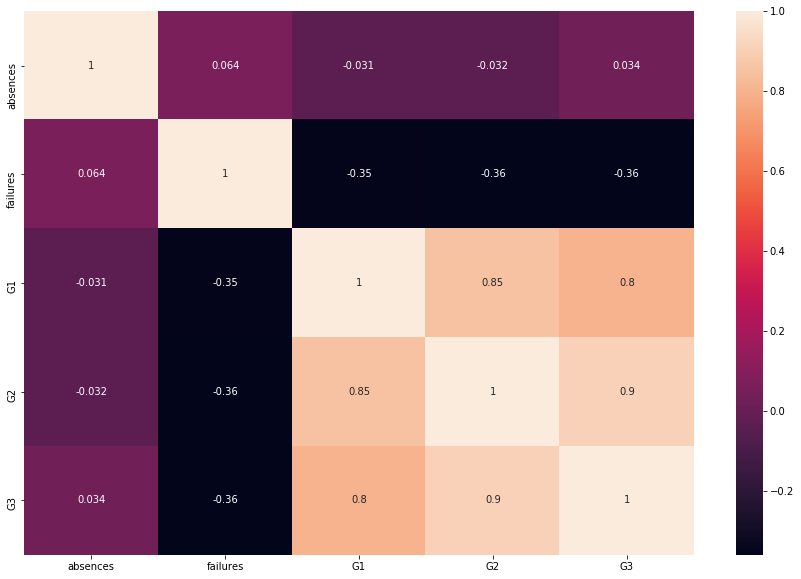

In [142]:
plt.figure(figsize=(15,10)) #specifying the heatmap figure size
sns.heatmap(corels, annot=True) #creating the heatmap of corels variable

### c) Using the similarity metrics (Euclidean distance and Manhattan distance), write code to find out the 5 most similar students to the students with studentIDs GP23 and MS46. The choice of the attributes to calculate the similarities is up to you. 

### Euclidean distance

In [143]:
#defining a function for euclidean distance
def euclidean_distance(p,q):
    return np.sqrt(np.power(p-q, 2).sum())

In [144]:
#function to sort out the nearest data
def perform_euclidean_distance(stdData, studentData, removeData):
    dict_={}
    for i in range(len(stdData.iloc[:,1:])):
        dict_[stdData.iloc[i,0]]=euclidean_distance(np.array(studentData.iloc[:,1:]),
                                                        np.array(stdData.iloc[i,1:]))

    # removing data starts with GP for dictionaray
    for k in list(dict_):
        if k.startswith(removeData):
            dict_.pop(k)
    print("Length of the dictionary: ", len(dict_))
    print()
    
    # sorting out dictionary data in ascending order
    sortedDict= sorted(dict_.items(), key=lambda x: x[1])
    print("Sorted data", sortedDict)
    print()
    
    # finding our nearest data
    nearestStudent = [sortedDict[i][0] for i in range(1,6)]
    print("Nearest Student", nearestStudent)

In [145]:
#Fetching specific data from data pandas DataFrame
stdData = data[["studentID","age","G1","G2","G3","school_native",
                   "sex_native","address_native","famsize_native",
                   "Pstatus_native","schoolsup_native","famsup_native",
                   "paid_native","activities_native","nursery_native",
                   "higher_native","internet_native","romantic_native",
                   "Medu_native","Fedu_native","Mjob_native","Fjob_native",
                   "reason_native","guardian_native","traveltime_native",
                   "studytime_native","famrel_native","freetime_native",
                   "Dalc_native","Walc_native","health_native",
                   "age_category"]]
stdData.head(4)

,studentID,age,G1,G2,G3,school_native,sex_native,address_native,famsize_native,Pstatus_native,...,reason_native,guardian_native,traveltime_native,studytime_native,famrel_native,freetime_native,Dalc_native,Walc_native,health_native,age_category
0,GP1,18,5,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,GP2,17,5,5,6,0,0,0,0,1,...,0,1,1,0,1,0,0,0,0,1
2,GP3,15,7,8,10,0,0,0,1,1,...,1,0,1,0,0,0,1,1,0,1
3,GP4,15,15,14,15,0,0,0,0,1,...,2,0,1,1,2,1,0,0,1,1


### Euclidean distance: StudentID GP23

In [146]:
# Fetching choosen data of studentId GP23
dataGP23 = data.loc[data['studentID']=='GP23'][["studentID","age","G1","G2","G3","school_native","sex_native",
                                     "address_native","famsize_native","Pstatus_native",
                                     "schoolsup_native","famsup_native","paid_native","activities_native",
                                     "nursery_native","higher_native","internet_native","romantic_native",
                                     "Medu_native","Fedu_native","Mjob_native","Fjob_native","reason_native",
                                     "guardian_native","traveltime_native","studytime_native","famrel_native",
                                     "freetime_native","Dalc_native","Walc_native","health_native","age_category"]]
dataGP23

,studentID,age,G1,G2,G3,school_native,sex_native,address_native,famsize_native,Pstatus_native,...,reason_native,guardian_native,traveltime_native,studytime_native,famrel_native,freetime_native,Dalc_native,Walc_native,health_native,age_category
22,GP23,16,15,15,16,0,1,0,1,1,...,0,0,1,0,0,4,0,1,1,1


In [147]:
perform_euclidean_distance(stdData, dataGP23, "MS")

Length of the dictionary:  349

Sorted data [('GP23', 0.0), ('GP66', 3.7416573867739413), ('GP116', 3.7416573867739413), ('GP60', 4.0), ('GP6', 4.47213595499958), ('GP336', 4.47213595499958), ('GP33', 4.58257569495584), ('GP10', 4.898979485566356), ('GP21', 5.0), ('GP188', 5.196152422706632), ('GP37', 5.385164807134504), ('GP92', 5.385164807134504), ('GP216', 5.385164807134504), ('GP15', 5.656854249492381), ('GP49', 5.656854249492381), ('GP102', 5.656854249492381), ('GP168', 5.656854249492381), ('GP197', 5.656854249492381), ('GP227', 5.656854249492381), ('GP140', 5.744562646538029), ('GP122', 5.830951894845301), ('GP105', 5.916079783099616), ('GP324', 5.916079783099616), ('GP139', 6.0), ('GP4', 6.082762530298219), ('GP58', 6.082762530298219), ('GP290', 6.082762530298219), ('GP343', 6.082762530298219), ('GP35', 6.164414002968976), ('GP57', 6.164414002968976), ('GP196', 6.164414002968976), ('GP110', 6.244997998398398), ('GP292', 6.244997998398398), ('GP300', 6.244997998398398), ('GP321',

#### Euclidean distance: StudentID MS46

In [148]:
# Fetching choosen data of studentId MS46
dataMS46 = data.loc[data['studentID']=='MS46'][["studentID","age","G1","G2","G3","school_native","sex_native",
                                     "address_native","famsize_native","Pstatus_native",
                                     "schoolsup_native","famsup_native","paid_native","activities_native",
                                     "nursery_native","higher_native","internet_native","romantic_native",
                                     "Medu_native","Fedu_native","Mjob_native","Fjob_native","reason_native",
                                     "guardian_native","traveltime_native","studytime_native","famrel_native",
                                     "freetime_native","Dalc_native","Walc_native","health_native","age_category"]]
dataMS46

,studentID,age,G1,G2,G3,school_native,sex_native,address_native,famsize_native,Pstatus_native,...,reason_native,guardian_native,traveltime_native,studytime_native,famrel_native,freetime_native,Dalc_native,Walc_native,health_native,age_category
45,MS46,19,8,9,9,1,1,0,1,1,...,0,1,1,2,2,1,3,1,1,2


In [149]:
perform_euclidean_distance(stdData, dataMS46, "GP")

Length of the dictionary:  46

Sorted data [('MS46', 0.0), ('MS5', 5.0), ('MS2', 5.196152422706632), ('MS10', 5.477225575051661), ('MS4', 5.5677643628300215), ('MS29', 5.5677643628300215), ('MS7', 6.0), ('MS40', 6.0), ('MS22', 6.082762530298219), ('MS44', 6.244997998398398), ('MS17', 6.708203932499369), ('MS45', 6.708203932499369), ('MS27', 7.0), ('MS33', 7.0710678118654755), ('MS42', 7.0710678118654755), ('MS14', 7.14142842854285), ('MS37', 7.280109889280518), ('MS20', 7.3484692283495345), ('MS34', 7.615773105863909), ('MS16', 7.745966692414834), ('MS36', 7.810249675906654), ('MS31', 8.0), ('MS38', 8.0), ('MS24', 8.12403840463596), ('MS25', 8.660254037844387), ('MS9', 8.717797887081348), ('MS13', 8.831760866327848), ('MS1', 9.055385138137417), ('MS23', 9.055385138137417), ('MS18', 9.1104335791443), ('MS21', 9.1104335791443), ('MS8', 9.486832980505138), ('MS6', 9.797958971132712), ('MS12', 10.04987562112089), ('MS3', 10.198039027185569), ('MS35', 11.180339887498949), ('MS19', 11.357816

### Manhattan distance

In [150]:
def manhattan_distance(p,q):
    return np.absolute(p-q).sum()

In [151]:
#function to sort out the nearest data
def perform_manhattan_distance(data, stdData, removeData):
    dict_={}
    for i in range(len(data.iloc[:,1:])):
        dict_[data.iloc[i,0]]=manhattan_distance(np.array(stdData.iloc[:,1:]),
                                                   np.array(data.iloc[i,1:]))

    # removing data starts with GP for dictionaray
    for k in list(dict_):
        if k.startswith(removeData):
            dict_.pop(k)
    print("Length of the dictionary:", len(dict_))
    print()
    
    # sorting out dictionary data in ascending order
    sortedDict= sorted(dict_.items(), key=lambda x: x[1])
    print("Sorted data:", sortedDict)
    print()

    # finding our nearest data
    nearestStudent = [sortedDict[i][0] for i in range(1,6)]
    print("Nearest Student:", nearestStudent)

### Manhattan distance: Student GP23

In [152]:
perform_manhattan_distance(stdData, dataGP23, "MS")

Length of the dictionary: 349

Sorted data: [('GP23', 0), ('GP60', 10), ('GP116', 10), ('GP6', 12), ('GP66', 12), ('GP33', 13), ('GP188', 13), ('GP336', 14), ('GP21', 15), ('GP10', 16), ('GP49', 16), ('GP139', 16), ('GP227', 16), ('GP37', 17), ('GP92', 17), ('GP140', 17), ('GP216', 17), ('GP343', 17), ('GP114', 18), ('GP168', 18), ('GP196', 18), ('GP197', 18), ('GP58', 19), ('GP84', 19), ('GP13', 20), ('GP15', 20), ('GP32', 20), ('GP57', 20), ('GP102', 20), ('GP121', 20), ('GP122', 20), ('GP201', 20), ('GP347', 20), ('GP4', 21), ('GP88', 21), ('GP105', 21), ('GP110', 21), ('GP172', 21), ('GP290', 21), ('GP292', 21), ('GP9', 22), ('GP16', 22), ('GP35', 22), ('GP43', 22), ('GP108', 22), ('GP111', 22), ('GP173', 22), ('GP225', 22), ('GP244', 22), ('GP349', 22), ('GP7', 23), ('GP52', 23), ('GP118', 23), ('GP124', 23), ('GP159', 23), ('GP182', 23), ('GP241', 23), ('GP250', 23), ('GP259', 23), ('GP289', 23), ('GP300', 23), ('GP321', 23), ('GP324', 23), ('GP22', 24), ('GP24', 24), ('GP28', 24

### Manhattan distance: Student MS46

In [153]:
perform_manhattan_distance(stdData, dataMS46, "GP")     

Length of the dictionary: 46

Sorted data: [('MS46', 0), ('MS5', 15), ('MS2', 17), ('MS10', 18), ('MS4', 19), ('MS29', 21), ('MS44', 21), ('MS7', 22), ('MS40', 22), ('MS22', 23), ('MS45', 23), ('MS27', 25), ('MS33', 26), ('MS42', 26), ('MS17', 27), ('MS36', 27), ('MS16', 28), ('MS20', 28), ('MS14', 29), ('MS25', 29), ('MS35', 29), ('MS37', 29), ('MS24', 30), ('MS34', 30), ('MS18', 31), ('MS21', 31), ('MS1', 32), ('MS13', 32), ('MS23', 32), ('MS38', 32), ('MS9', 34), ('MS31', 34), ('MS41', 34), ('MS19', 35), ('MS39', 35), ('MS12', 37), ('MS43', 37), ('MS3', 38), ('MS8', 38), ('MS11', 41), ('MS28', 41), ('MS32', 41), ('MS6', 42), ('MS15', 43), ('MS30', 44), ('MS26', 51)]

Nearest Student: ['MS5', 'MS2', 'MS10', 'MS4', 'MS29']


# 5. Data Exploration and Visualization

### a) Write code to show histogram plots of the variables age, absences, G1, G2 and G3. Use proper labels in the graph.

Text(0.5, 1.0, 'Student Enrollment Statistics By Age')

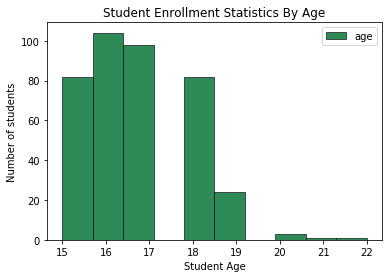

In [154]:
#Plotting histogram of the age level of the enrolled student
plt.hist(data["age"], label="age", color="seagreen",
         edgecolor="black", linewidth=0.6)
plt.xlabel('Student Age')
plt.ylabel('Number of students')
plt.legend()
plt.title("Student Enrollment Statistics By Age")

Text(0.5, 1.0, 'Student Enrollment Statistics By Absences')

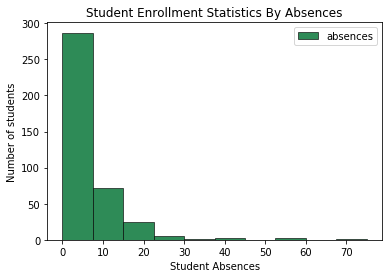

In [155]:
#Plotting histogram consisting the number of absent days of the student
plt.hist(data["absences"], label="absences", color="seagreen",
         edgecolor="black", linewidth=0.6)
plt.xlabel('Student Absences')
plt.ylabel('Number of students')
plt.legend()
plt.title("Student Enrollment Statistics By Absences")

Text(0.5, 1.0, 'First Period Grade Statistics')

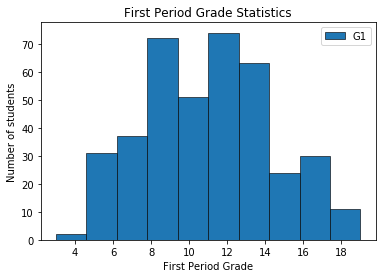

In [156]:
#Plotting histogram of the first period grade that students achieved
plt.hist(data["G1"], label="G1", edgecolor="black", linewidth=0.6)
plt.legend()
plt.xlabel('First Period Grade')
plt.ylabel('Number of students')
plt.title("First Period Grade Statistics")

Text(0.5, 1.0, 'Second Period Grade Statistics')

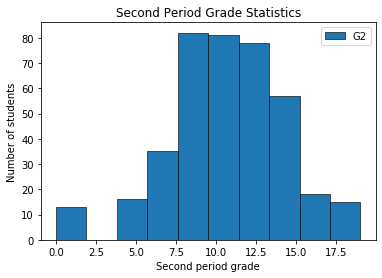

In [157]:
#Plotting histogram of the second period grade that students achieved
plt.hist(data["G2"], label="G2", edgecolor="black", linewidth=0.6)
plt.legend()
plt.xlabel('Second period grade')
plt.ylabel('Number of students')
plt.title("Second Period Grade Statistics")

Text(0.5, 1.0, 'Final Grade Statistics')

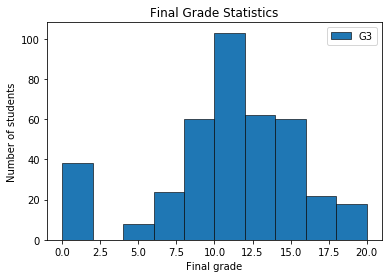

In [158]:
#Plotting histogram of the final grade that students achieved
plt.hist(data["G3"], label="G3", edgecolor="black", linewidth=0.6)
plt.xlabel('Final grade')
plt.ylabel('Number of students')
plt.legend()
plt.title("Final Grade Statistics")

### b) Write code to show a bar graph of the total number of students who passed the final term grouped according to the school that they belong to. Use proper labels in the graph.

In [159]:
data[["G3","passed"]].head() # displaying passed status on the final grade (G3)

,G3,passed
0,6,no
1,6,no
2,10,yes
3,15,yes
4,10,yes


In [160]:
passed_data = data[data.passed=="yes"] #extracting passed students of final term
schl_cnt = passed_data['school'].value_counts() #counting passed students of each school
schl_cnt

GP    288
MS     37
Name: school, dtype: int64

Text(1, 40, '37')

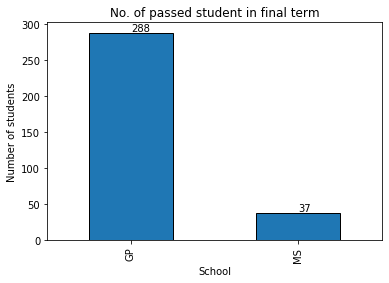

In [161]:
#Plotting the bargraph showing the total number of passed student in the final term
#according to the school (GP and MS)
schl_cnt.plot(kind="bar", edgecolor="black")
plt.title("No. of passed student in final term")
plt.ylabel("Number of students")
plt.xlabel("School")
plt.text(0,290,288)
plt.text(1,40,37)

### c) Write code to show a bar graph of the total number of students who failed the final term grouped according to their weekly study time. Use proper labels in the graph.

In [162]:
data[['studytime','G3']].head()

,studytime,G3
0,2 to 5 hours,6
1,2 to 5 hours,6
2,2 to 5 hours,10
3,5 to 10 hours,15
4,2 to 5 hours,10


In [163]:
fail_data = data[data.G3 < 8] #Getting final failed result from column G3 
wstdtime_cnt = fail_data['studytime'].value_counts() #Total number of failed students according to fail_data
wstdtime_cnt

2 to 5 hours     37
<2 hours         22
5 to 10 hours     7
>10 hours         4
Name: studytime, dtype: int64

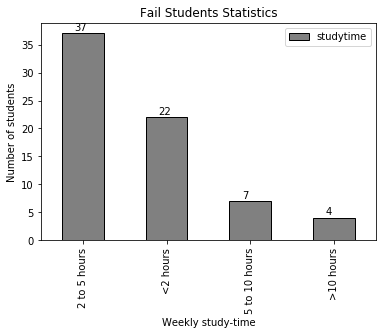

In [164]:
#Plotting the bargraph showing the total number of failed student in the final term (G3)
wstdtime_cnt.plot(kind='bar', color="grey", edgecolor="black")
plt.title("Fail Students Statistics")
plt.ylabel("Number of students")
plt.xlabel("Weekly study-time")
plt.text(-0.1,37.5,37)
plt.text(0.9,22.5,22)
plt.text(1.9,7.5,7)
plt.text(2.9,4.5,4)
plt.legend()

# 6. Further Analysis
### a) Total students in each school according to the dataset

In [165]:
#Counting the total no. of school with its total students
student_schl = data['school'].value_counts()
student_schl

GP    349
MS     46
Name: school, dtype: int64

Text(0.5, 1.0, 'Number of Students According to the School')

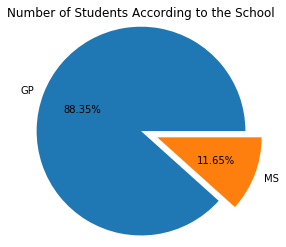

In [166]:
#Plotting pie-chart containing the total no of each school student's
plt.pie(student_schl, 
        explode=[0,0.2], 
        labels=["GP","MS"], 
        autopct="%.2f%%",
        radius=1.2,
       )
plt.title("Number of Students According to the School")

### b) Gender Calculation of each schools' the students 

#### i) Gender Statistics of GP School

In [167]:
#Counting the total no. of male and female gender in GP school
gp_std_sex = data.loc[data["school"]=="GP","sex"].value_counts()
gp_std_sex

F    183
M    166
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender Statistics of GP School')

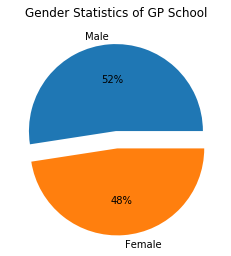

In [168]:
#Plotting pie-chart containing the total no of male and female students in GP school
plt.pie(gp_std_sex, 
        explode=[0,0.2], 
        labels=["Male","Female"], 
        autopct="%.0f%%",
       )
plt.title("Gender Statistics of GP School")

#### ii) Gender Statistics of MS School

In [169]:
#Counting the total no. of male and female gender in MS school
ms_std_sex = data.loc[data["school"]=="MS","sex"].value_counts()
ms_std_sex

F    25
M    21
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender Statistics of GP School')

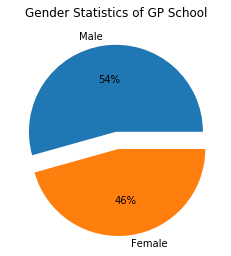

In [170]:
#Plotting pie-chart containing the total no of male and female students in GP school
plt.pie(ms_std_sex, 
        explode=[0,0.2], 
        labels=["Male","Female"], 
        autopct="%.0f%%",
       )
plt.title("Gender Statistics of GP School")

#### iii) Gender Statistics of Overall Schools

In [171]:
#Counting the total no. of male and female gender
school_sex = data["sex"].value_counts()
school_sex

F    208
M    187
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender Statistics of GP School')

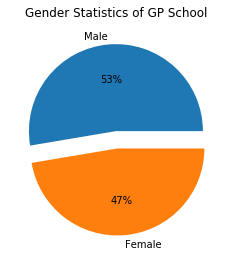

In [172]:
#Plotting pie-chart containing the total no of male and female students
plt.pie(school_sex, 
        explode=[0,0.2], 
        labels=["Male","Female"], 
        autopct="%.0f%%",
       )
plt.title("Gender Statistics of GP School")

### c) Total number of passed and failed students in each school

#### i) Passed Column Status of GP School

In [173]:
#Counting the total no. of male and female gender in GP school
gp_passed_count = data.loc[data["school"]=="GP","passed"].value_counts()
gp_passed_count

yes    288
no      61
Name: passed, dtype: int64

In [174]:
# calculating total percentage rate of passed students
gp_passed_rate = (gp_passed_count['yes']/gp_passed_count.sum())*100
gp_passed_rate

82.52148997134671

In [175]:
# calculating total percentage rate of failed students
gp_fail_rate = (gp_passed_count['no']/gp_passed_count.sum())*100
gp_fail_rate

17.478510028653297

#### ii) Passed Column Status of MS School

In [176]:
#Counting the total no. of male and female gender in MS school
ms_passed_count = data.loc[data["school"]=="MS","passed"].value_counts()
ms_passed_count

yes    37
no      9
Name: passed, dtype: int64

In [177]:
# calculating total percentage rate of passed students
ms_passed_rate = (ms_passed_count['yes']/ms_passed_count.sum())*100
ms_passed_rate

80.43478260869566

In [178]:
# calculating total percentage rate of failed students
ms_fail_rate = (ms_passed_count['no']/ms_passed_count.sum())*100
ms_fail_rate

19.565217391304348

#### iii) Passed Column Status of both MS & GP School in a bar-graph

In [179]:
rate_index=["gp_passed_rate","gp_fail_rate","ms_passed_rate","ms_fail_rate"]

In [180]:
new_df = pd.DataFrame({"Percentage":[gp_passed_rate,gp_fail_rate,ms_passed_rate,ms_fail_rate]},
                       index=rate_index)
new_df

,Percentage
gp_passed_rate,82.521490
gp_fail_rate,17.478510
ms_passed_rate,80.434783
ms_fail_rate,19.565217


Text(0, 0.5, 'Percentage')

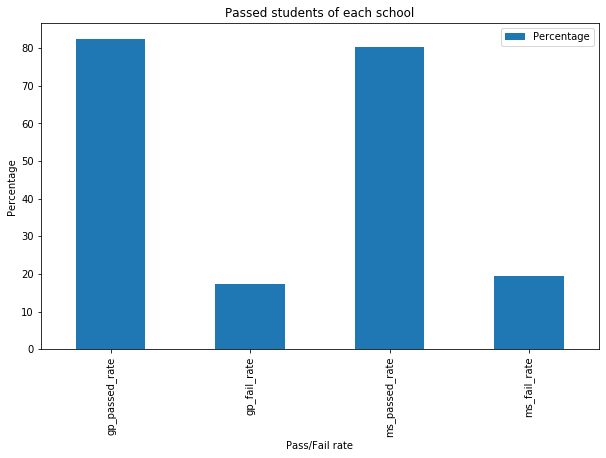

In [181]:
#Plotting bar-graph containing pass status of each school
new_df.plot.bar(rot=0, figsize=(10,6))
plt.xticks(rotation="vertical")
plt.title("Passed students of each school")
plt.xlabel("Pass/Fail rate")
plt.ylabel("Percentage")

### d) Student's family status
#### i) Mother Job Analysis

In [182]:
#counting mother's job  of the students
mother_cnt = data['Mjob'].value_counts()
mother_cnt

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

Text(3.93, 25, '34')

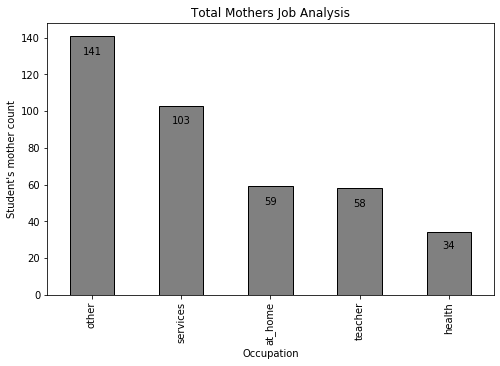

In [183]:
#Plotting bar-graph of total mother's job
plt.figure(figsize=(8,5))
mother_cnt.plot(kind="bar", color="grey", edgecolor="black")
plt.title("Total Mothers Job Analysis")
plt.xlabel("Occupation")
plt.ylabel("Student's mother count")
plt.text(-0.1,131,141)
plt.text(0.9,93,103)
plt.text(1.93,49,59)
plt.text(2.93,48,58)
plt.text(3.93,25,34)

#### ii) Father Job Analysis

In [184]:
#counting father's job  of the students
father_cnt = data['Fjob'].value_counts()
father_cnt

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

Text(3.93, 5, '18')

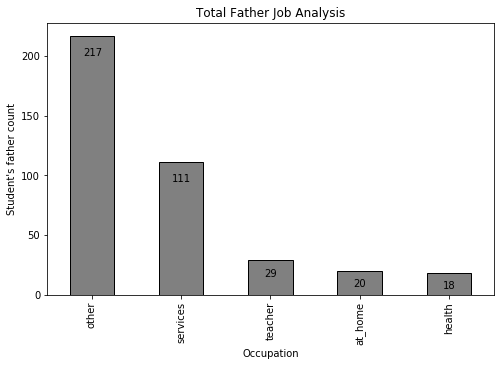

In [185]:
#Plotting bar-graph of total father's job
plt.figure(figsize=(8,5))
father_cnt.plot(kind="bar", color="grey", edgecolor="black")
plt.title("Total Father Job Analysis")
plt.xlabel("Occupation")
plt.ylabel("Student's father count")
plt.text(-0.1,200,217)
plt.text(0.9,95,111)
plt.text(1.93,15,29)
plt.text(2.93,7,20)
plt.text(3.93,5,18)

### iii) Parent's Education

In [186]:
#counting father's education
Fedu_cnt = data['Fedu'].value_counts().sort_index(ascending=True)
Fedu_cnt

5th to 9th grade                 115
higher education                  96
none                               2
primary education (4th grade)     82
secondary education              100
Name: Fedu, dtype: int64

In [187]:
#counting mothers's education
Medu_cnt = data['Medu'].value_counts().sort_index(ascending=True)
Medu_cnt

5th to 9th grade                 103
higher education                 131
none                               3
primary education (4th grade)     59
secondary education               99
Name: Medu, dtype: int64

In [188]:
edu_index = Medu_cnt.index #Fetching index of Medu_cnt relation
edu_index

Index(['5th to 9th grade', 'higher education', 'none',
       'primary education (4th grade)', 'secondary education'],
      dtype='object')

In [189]:
#Creating a new pandas dataframe combining Medu_cnt and Fedu_cnt variables
d2 = pd.DataFrame({'Fedu':Fedu_cnt,
                  'Medu':Medu_cnt},index=edu_index)
d2

,Fedu,Medu
5th to 9th grade,115,103
higher education,96,131
none,2,3
primary education (4th grade),82,59
secondary education,100,99


Text(0, 0.5, 'No. of Parents')

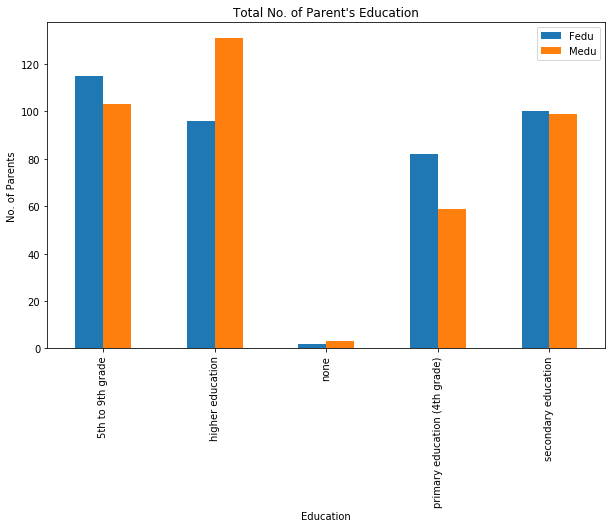

In [190]:
#Plotting bar-graph containing family education status
d2.plot.bar(rot=0, figsize=(10,6))
plt.xticks(rotation="vertical")
plt.title("Total No. of Parent's Education")
plt.xlabel("Education")
plt.ylabel("No. of Parents")

### iv) Students Pass and fail status according to the family relationship

In [191]:
pass_data = data[data.passed=="yes"] #Fetching all the passed students
pass_rel_cnt = pass_data["famrel"].value_counts() #Counting the no. of passed students according to family relation
pass_rel_cnt

very good    162
excellent     88
good          55
bad           13
very bad       7
Name: famrel, dtype: int64

In [192]:
fail_data = data[data.passed=="no"] #Fetching all the failed students
fail_rel_cnt = fail_data["famrel"].value_counts() #Counting the no. of failed students according to family relation
fail_rel_cnt

very good    33
excellent    18
good         13
bad           5
very bad      1
Name: famrel, dtype: int64

In [193]:
frel_index = pass_rel_cnt.index #Fetching index of family relation
frel_index

Index(['very good', 'excellent', 'good', 'bad', 'very bad'], dtype='object')

In [194]:
#Creating a new pandas dataframe to add pass_relation_count data and fail_relation_count data
d3 = pd.DataFrame({'frel_pass_rate':pass_rel_cnt,
                  'frel_fail_rate':fail_rel_cnt},index=frel_index)
d3

,frel_pass_rate,frel_fail_rate
very good,162,33
excellent,88,18
good,55,13
bad,13,5
very bad,7,1


Text(0, 0.5, 'No. of Students')

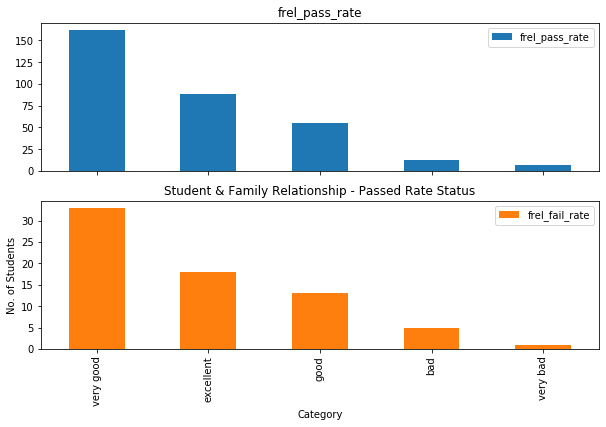

In [195]:
#Plotting bar-graph containing family relation of passed and failed student
d3.plot.bar(rot=0, subplots=True, figsize=(10,6))
plt.xticks(rotation="vertical")
plt.title("Student & Family Relationship - Passed Rate Status")
plt.xlabel("Category")
plt.ylabel("No. of Students")

### e) Passed rate according to student's health condition

In [196]:
h_data = pass_data['health'].value_counts() #Count pass data according to their health condition
h_data

excellent    120
good          75
very good     53
very bad      42
bad           35
Name: health, dtype: int64

Text(0.5, 1.0, 'Gender Statistics of GP School')

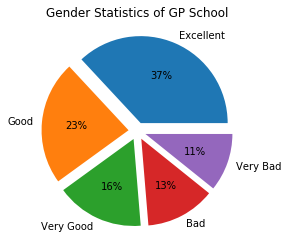

In [197]:
#Plotting pie-chart containing the pass rate of the students according to the health condition
plt.pie(h_data, 
        explode=[0.1,0.1,0.1,0.1,0.1], 
        labels=["Excellent","Good","Very Good", "Bad", "Very Bad"], 
        autopct="%.0f%%",
       )
plt.title("Gender Statistics of GP School")

### f) How much TravelTime affected to student attendance  

In [198]:
data[data["traveltime"]=='15 to 30 min.']["absences"].sum()

646

In [199]:
data[data["traveltime"]=='<15 min.']["absences"].sum()

1459

In [200]:
data[data["traveltime"]=='0 min. to 1 hour']["absences"].sum()

0

In [201]:
data[data["traveltime"]=='>1 hour']["absences"].sum()

36

### g) Alcohol drinking students Analysis

#### i) Total weekly alcohol consuming student 

In [202]:
walc_cnt = data['Walc'].value_counts()
walc_cnt

very low     151
low           85
medium        80
high          51
very high     28
Name: Walc, dtype: int64

#### i) Weekly alcohol consuming student pass status count

In [203]:
data[data['Walc']=="very high"]["passed"].value_counts()

yes    23
no      5
Name: passed, dtype: int64

In [204]:
data[data['Walc']=="high"]["passed"].value_counts()

yes    43
no      8
Name: passed, dtype: int64

In [205]:
data[data['Walc']=="medium"]["passed"].value_counts()

yes    71
no      9
Name: passed, dtype: int64

In [206]:
data[data['Walc']=="low"]["passed"].value_counts()

yes    66
no     19
Name: passed, dtype: int64

In [207]:
data[data['Walc']=="very low"]["passed"].value_counts()

yes    122
no      29
Name: passed, dtype: int64

#### iii) Weekly alcohol consuming student absence rate

In [208]:
data[data['Walc']=="very high"]["absences"].sum()

193

In [209]:
data[data['Walc']=="high"]["absences"].sum()

425

In [210]:
data[data['Walc']=="medium"]["absences"].sum()

514

In [211]:
data[data['Walc']=="low"]["absences"].sum()

390

In [212]:
data[data['Walc']=="very low"]["absences"].sum()

733

### Use of Seaborn charts for further analysis

#### Passed student in final grade according to the gender and their age

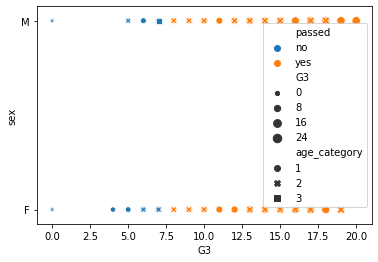

In [213]:
internet_G3_sns = sns.scatterplot(x="G3",
                                  y="sex",
                                  data=data,
                                  hue="passed",
                                  style="age_category",
                                  size="G3")


#### Passed student according to the studytime

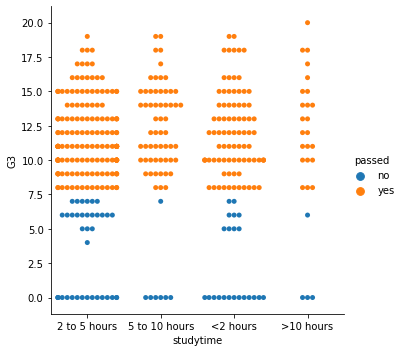

In [214]:
sns.catplot(x="studytime",y="G3", data=data, hue="passed", kind="swarm")

#### Passed student according to the mothers job

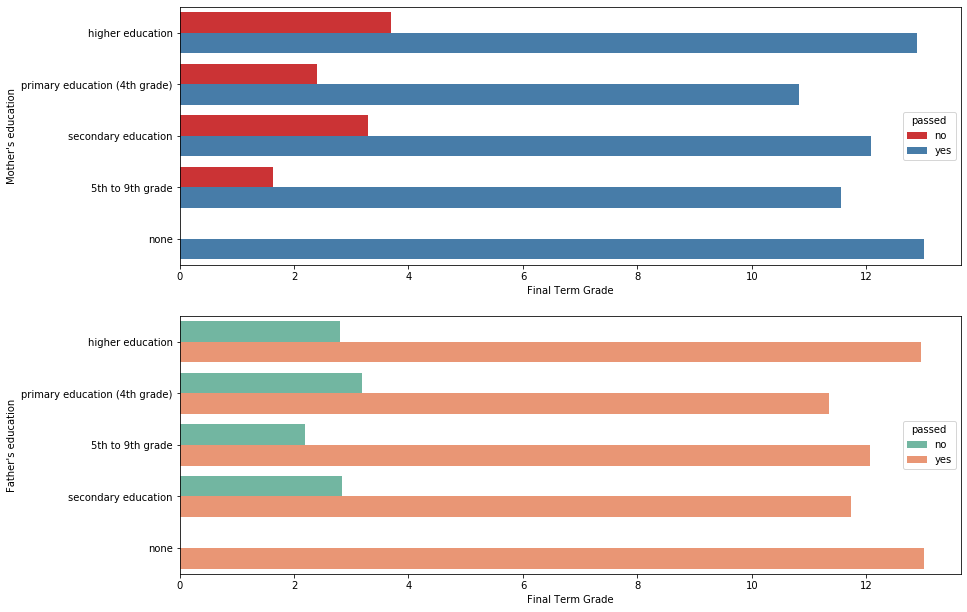

In [215]:
f, axes = plt.subplots(2, 1, figsize=(14,9)) # creates subplot grid with 1 row and 2 columns
passGradeG1=sns.barplot(y="Medu", x="G3", data=data, hue="passed",ax=axes[0],ci=None,palette="Set1")
passGradeG1.set(xlabel="Final Term Grade",ylabel="Mother's education")
passGradeG2=sns.barplot(y="Fedu", x="G3", data=data, hue="passed",ax=axes[1],ci=None,palette="Set2")
passGradeG2.set(xlabel="Final Term Grade",ylabel="Father's education")
plt.subplots_adjust(top=1)

#### Health Condition of the weekly and daily alcohol comsumption of the students

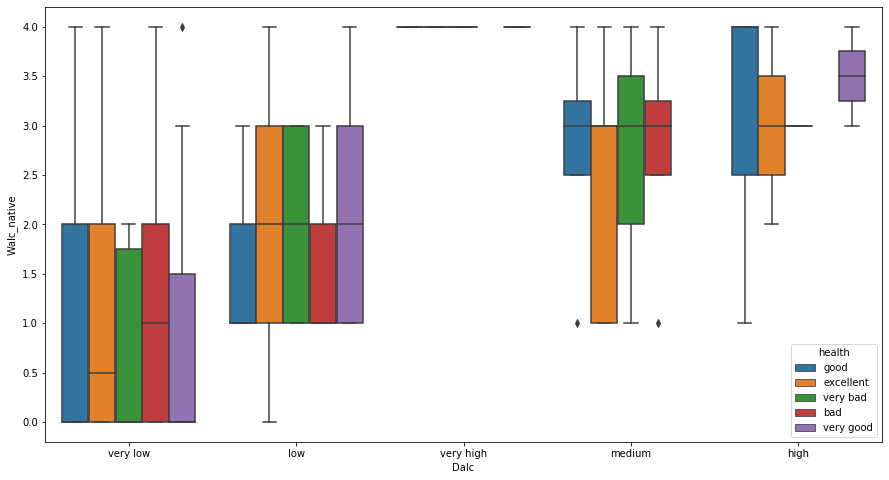

In [216]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Dalc",y="Walc_native",data=data, hue="health")

#### Compating pass status on first & second to the final period grade

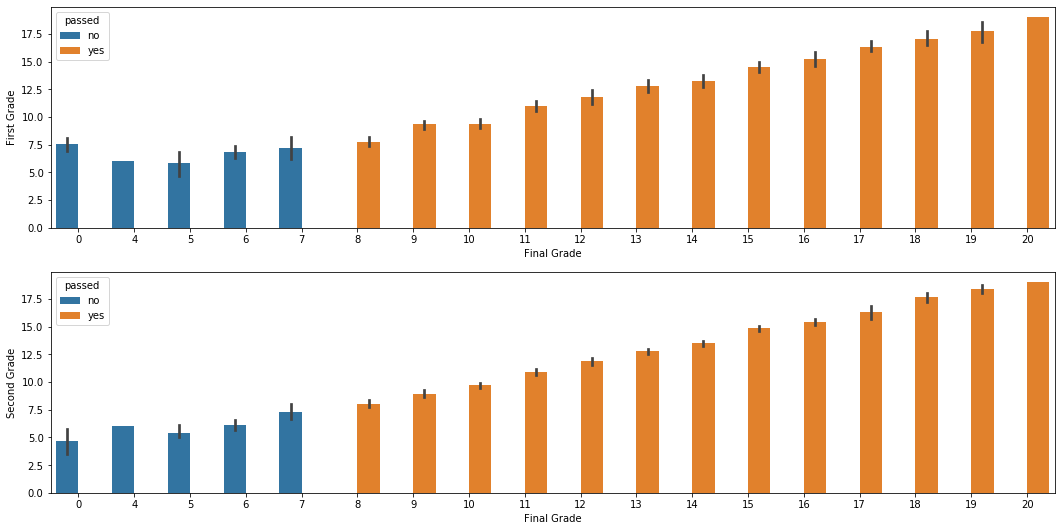

In [232]:
f, axes = plt.subplots(2,1, figsize=(18,10))
pg1 = sns.barplot(y="G1", x="G3", data=data, hue="passed", ax=axes[0])
pg1.set(xlabel="Final Grade", ylabel="First Grade")
pg2 = sns.barplot(y="G2", x="G3", data=data, hue="passed", ax=axes[1])
pg2.set(xlabel="Final Grade", ylabel="Second Grade")
plt.subplots_adjust(top=0.8)

In [ ]:
sns.catplot(x="internet", y="studytime_native", data=data, kind="swarm", hue="freetime_native", aspect=2)